In [1]:
import pandas as pd
import numpy as np
import os
import sys

# Load other functions
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../scripts'))

from data_loader import CSVDataloader, get_file_path
from data_processing import Processing
from feature_engineering import FeatureEngineering
from credit_scoring import CreditScoring
from train_model import RiskPrediction

## Load Credit Risk data for Analysis

In [2]:
# Load AAPL data
data = get_file_path("csvpath")
df = CSVDataloader(data).load_data()

In [3]:
df.shape

(95662, 16)

In [4]:
df.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [3]:
preprocess = Processing(df)


In [5]:
# Call functions
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Overview of the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [7]:
df.size

1530592

In [9]:
df.shape

(95662, 16)

In [5]:
df['ChannelId'].value_counts()

ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64

In [6]:
df['ProviderId'].value_counts()

ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
ProviderId_2       18
Name: count, dtype: int64

In [7]:
df['ProductCategory'].value_counts()

ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64

### Summary Statistics

In [8]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

In [14]:
# Central Tendency
print("\n--- Central Tendency ---")
print("Mean:\n", numeric_cols.mean())
print("Median:\n", numeric_cols.median())
print("Mode:\n", numeric_cols.mode().iloc[0])


--- Central Tendency ---
Mean:
 CountryCode         256.000000
Amount             6717.846433
Value              9900.583941
PricingStrategy       2.255974
FraudResult           0.002018
dtype: float64
Median:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
dtype: float64
Mode:
 CountryCode         256.0
Amount             1000.0
Value              1000.0
PricingStrategy       2.0
FraudResult           0.0
Name: 0, dtype: float64


In [9]:
# Dispersion
print("\n--- Dispersion ---")
print("Standard Deviation:\n", numeric_cols.std())


--- Dispersion ---
Standard Deviation:
 CountryCode             0.000000
Amount             123306.797164
Value              123122.087776
PricingStrategy         0.732924
FraudResult             0.044872
dtype: float64


In [10]:
print("Variance:\n", numeric_cols.var())

Variance:
 CountryCode        0.000000e+00
Amount             1.520457e+10
Value              1.515905e+10
PricingStrategy    5.371778e-01
FraudResult        2.013471e-03
dtype: float64


In [11]:
print("Range:\n", numeric_cols.max() - numeric_cols.min())

Range:
 CountryCode               0.0
Amount             10880000.0
Value               9879998.0
PricingStrategy           4.0
FraudResult               1.0
dtype: float64


In [12]:
print("Interquartile Range (IQR):\n", numeric_cols.quantile(0.75) - numeric_cols.quantile(0.25))

Interquartile Range (IQR):
 CountryCode           0.0
Amount             2850.0
Value              4725.0
PricingStrategy       0.0
FraudResult           0.0
dtype: float64


In [13]:
# Shape of Distribution
print("\n--- Shape of Distribution ---")
print("Skewness:\n", numeric_cols.skew())


--- Shape of Distribution ---
Skewness:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [14]:
print("Kurtosis:\n", numeric_cols.kurtosis())

Kurtosis:
 CountryCode           0.000000
Amount             3363.127739
Value              3378.069274
PricingStrategy       2.087534
FraudResult         490.685762
dtype: float64


### Distribution of Numerical Features
Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.


In [15]:
preprocess = Processing(df)

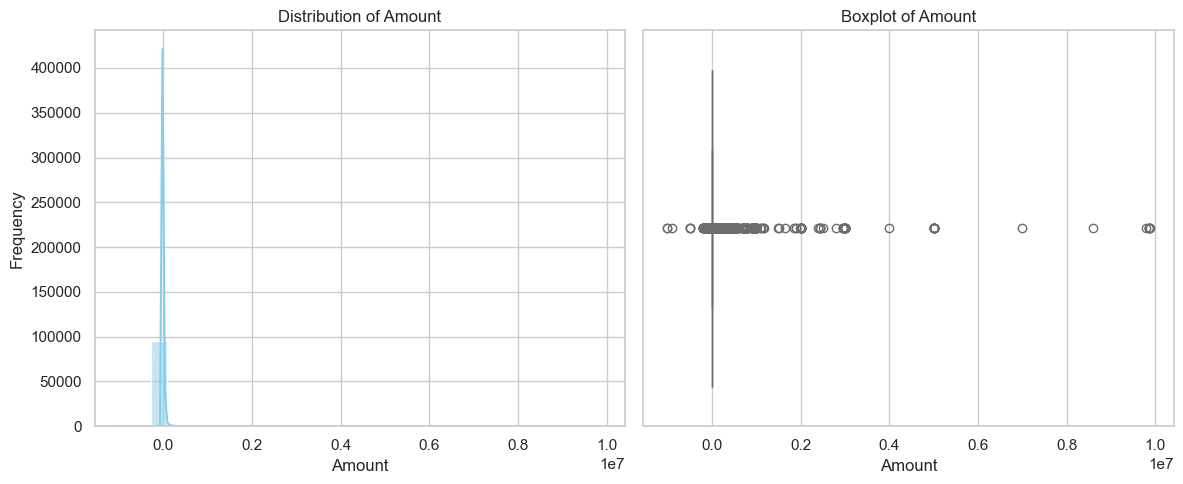

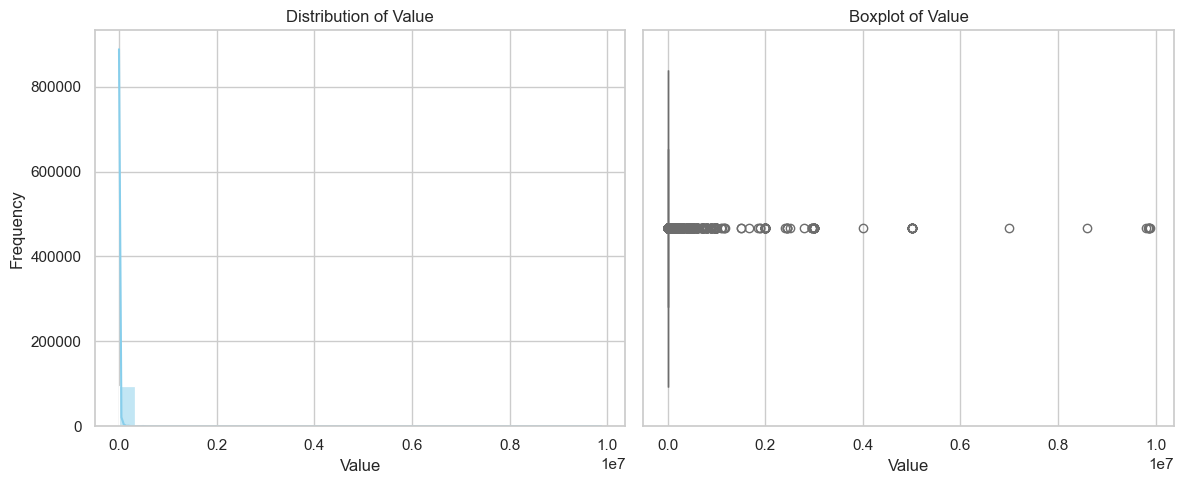

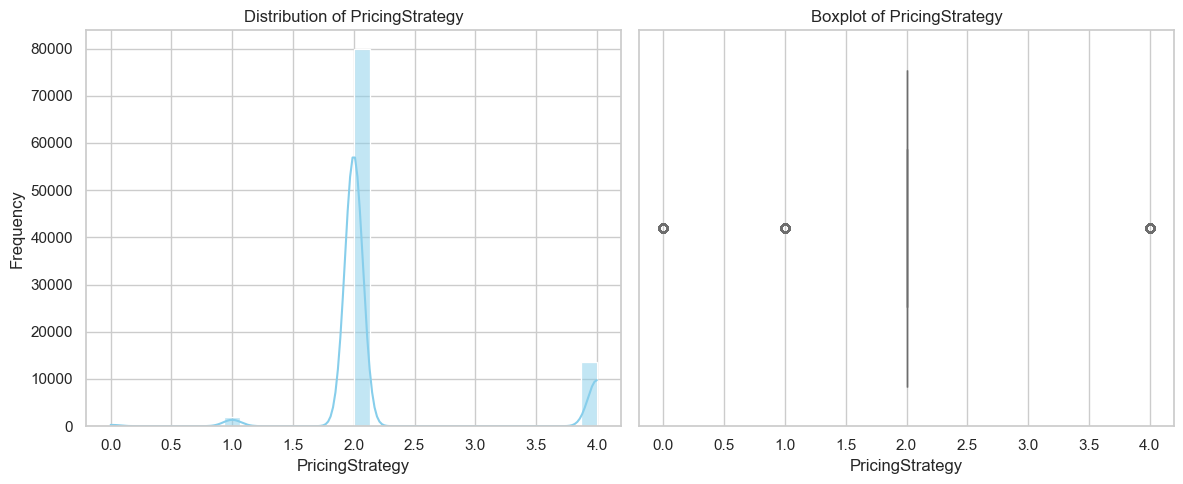

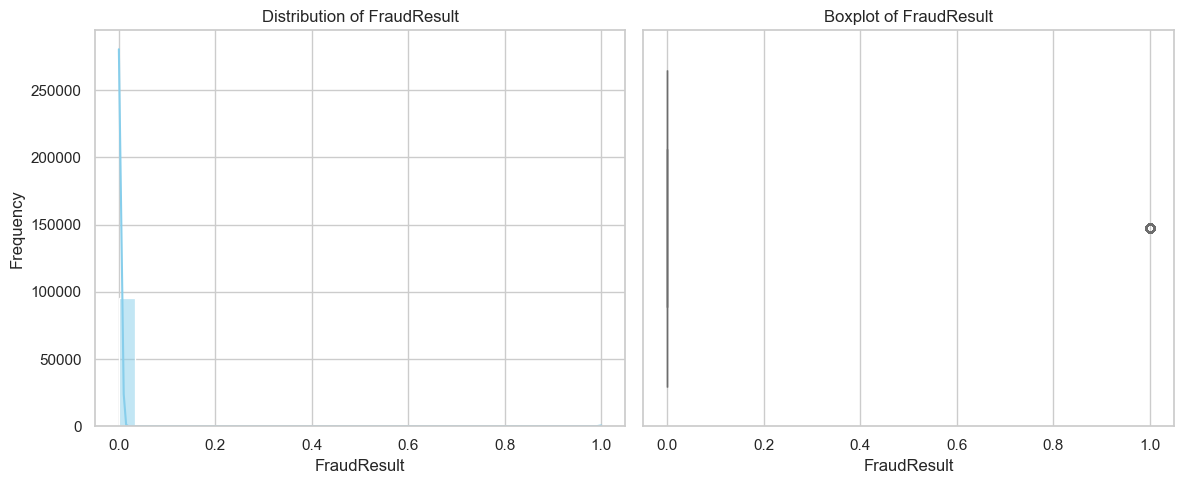

In [16]:
preprocess.numeric_distributions()

### Distribution of Categorical Features

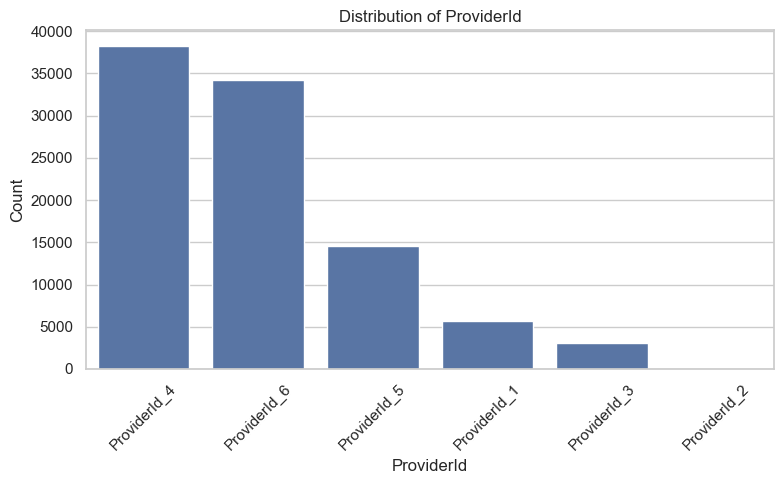

In [17]:
preprocess.categorical_distributions(column='ProviderId')

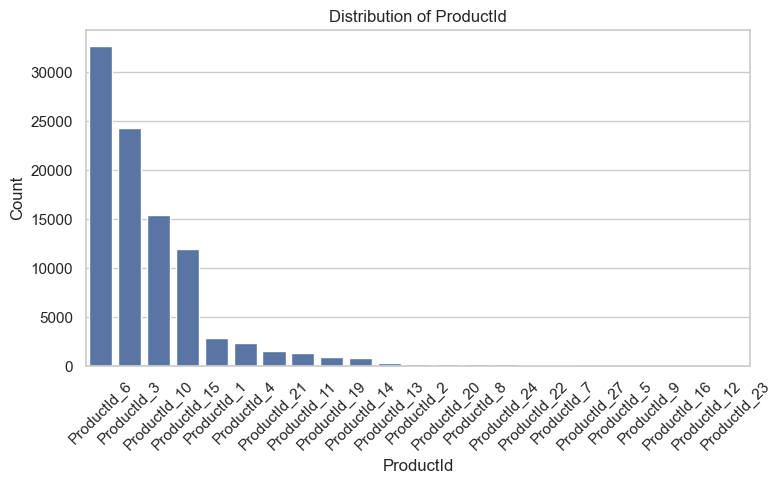

In [18]:
preprocess.categorical_distributions(column='ProductId')

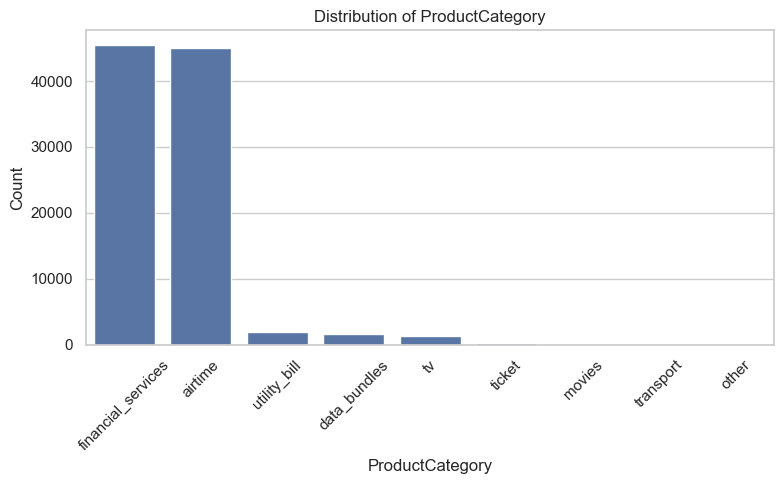

In [19]:
preprocess.categorical_distributions(column='ProductCategory')

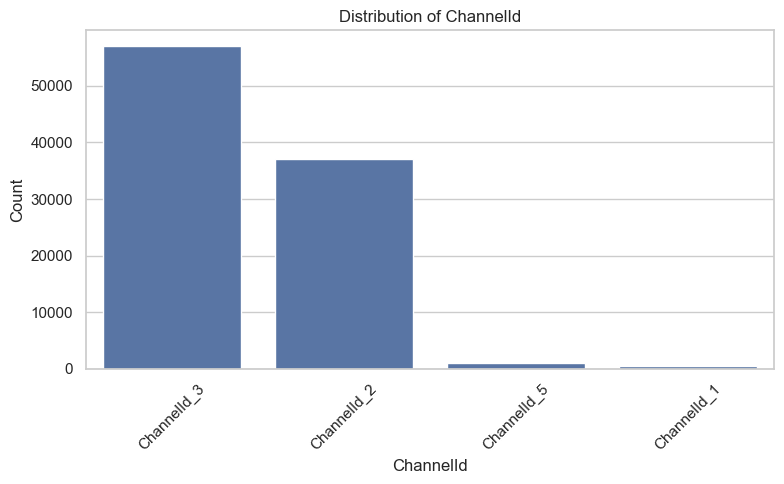

In [20]:
preprocess.categorical_distributions(column='ChannelId')

### Correlation Analysis

In [21]:
df.select_dtypes(include=[np.number]).corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


### Correlation Analysis
○	Understanding the relationship between numerical features

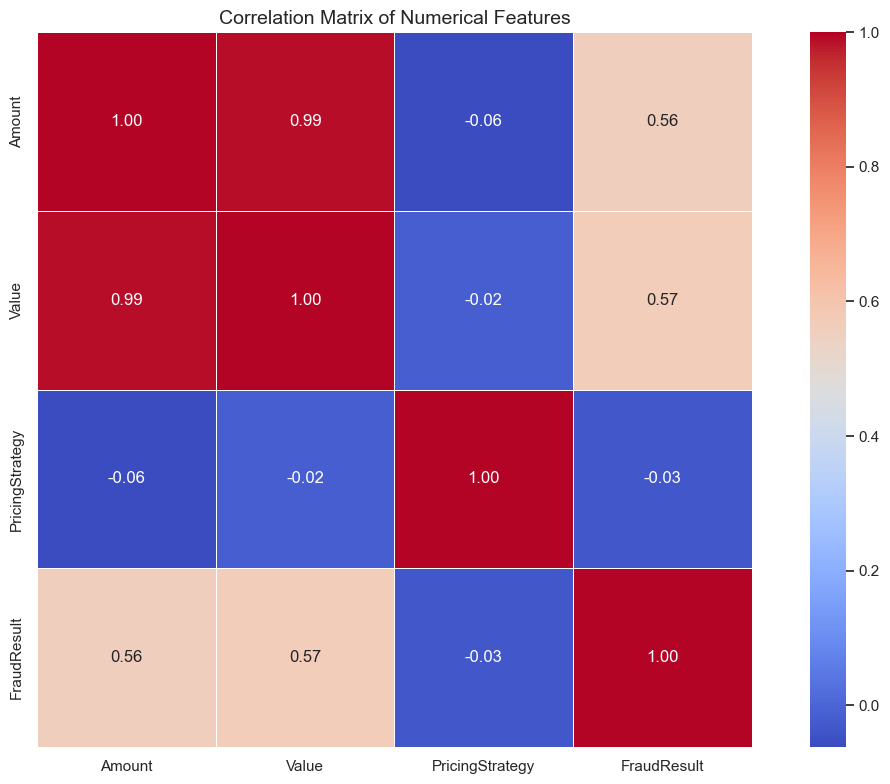

In [22]:
preprocess.plot_correlation_matrix()

### Identifying Missing Values
○	Identify missing values to determine missing data and decide on appropriate imputation strategies


--- Missing Values Summary ---

Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

Visualizing Missingness (useful for pattern detection):


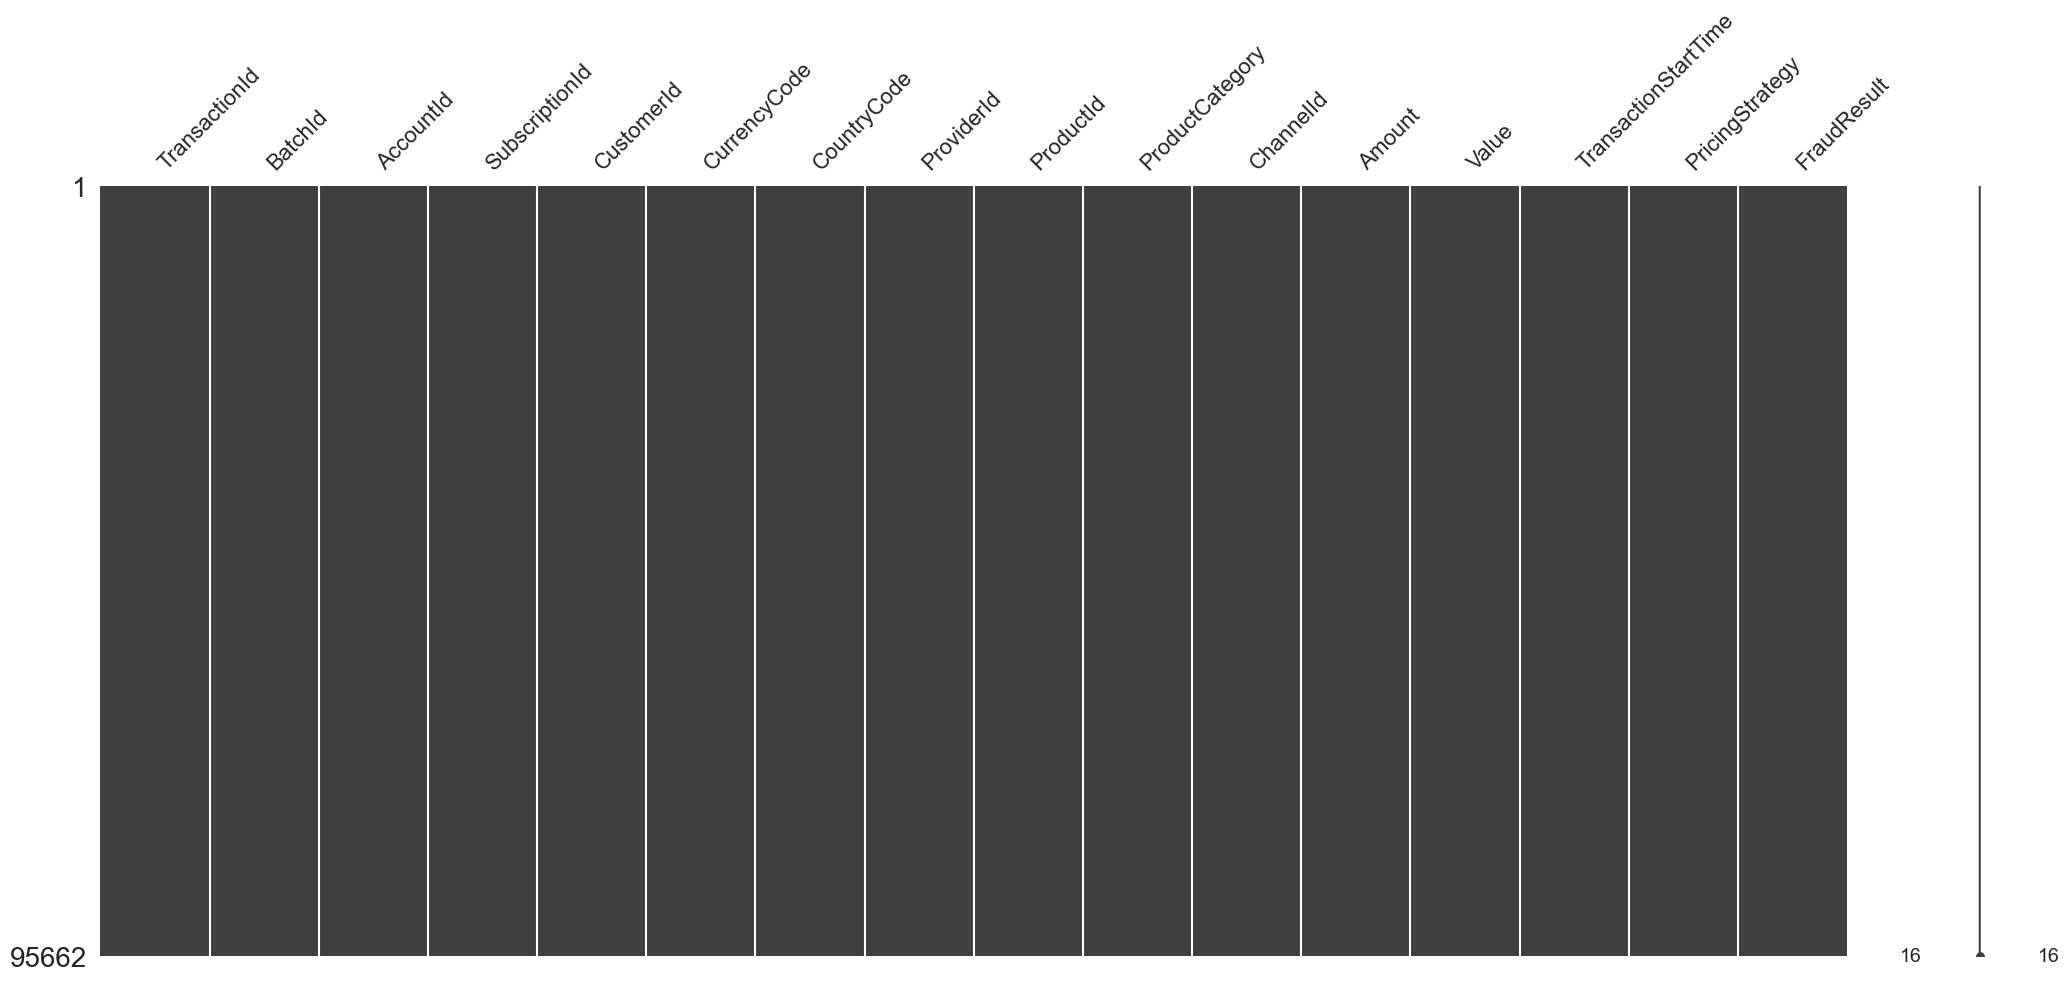

In [23]:
preprocess.missing_values()

### Outlier Detection


--- Outlier Detection Using Boxplots ---



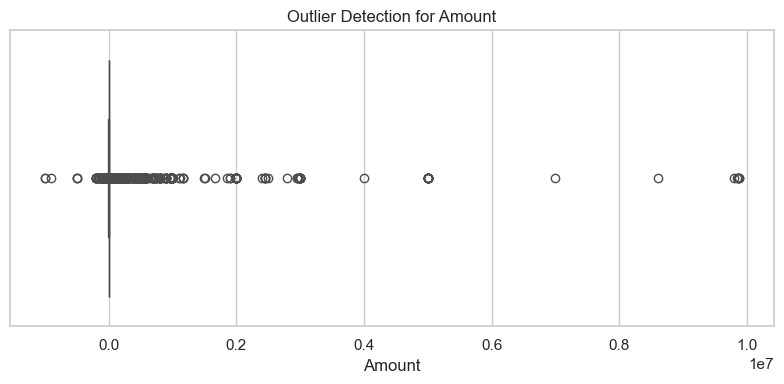

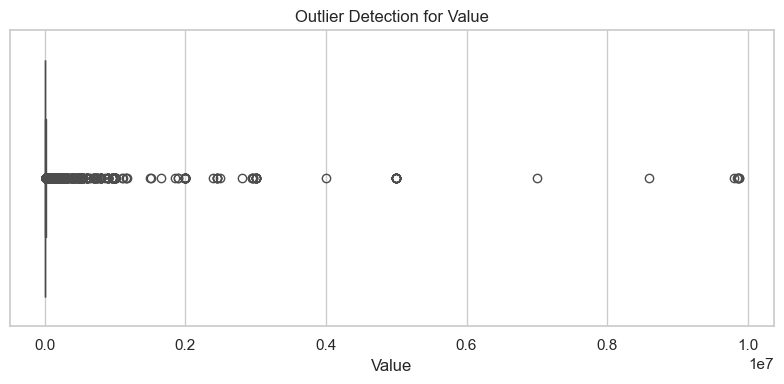

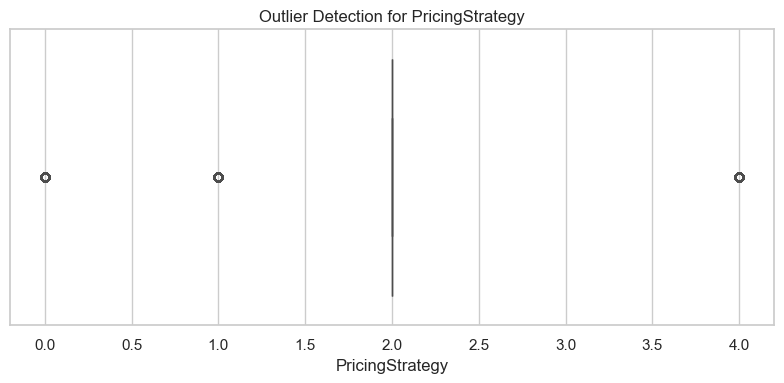

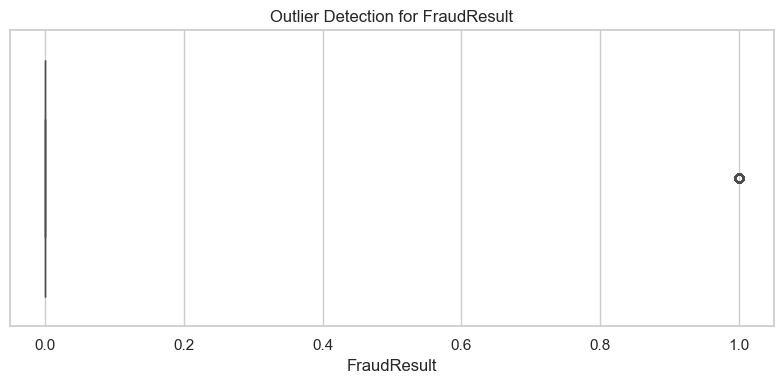

In [24]:
preprocess.detect_outliers()

# Feature Engineering
Build a robust, automated, and reproducible data processing script that transforms raw data into a model-ready format.

In [3]:
# drop columns
df = df.drop(columns=['CountryCode','CurrencyCode', 'BatchId','Value'], axis=1)

### Create Aggregate Features

In [4]:
feature = FeatureEngineering(df)

In [5]:
df =feature.create_aggregate_features()

In [9]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


### Extract Features

In [6]:
df = feature.extract_datetime_features()

In [7]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,TransactionCount,StdTransactionAmount,TransactionHour,TransactionDay,TransactionMonth,TransactionYear
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,119,3042.294251,2,15,11,2018
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,2,0.000000,2,15,11,2018
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,38,17169.241610,3,15,11,2018


### Encode Categorical Variables
Convert categorical variables into numerical format by using onehot

In [7]:
df = feature.encode_categorical_variables()

In [11]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2,0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2,0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2,0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2,0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2,0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Handle Missing Values
Use imputation or Removal to handle missing values

In [8]:
df = feature.handle_missing_values()

In [15]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,1000.0,2018-11-15 02:18:49+00:00,2.0,0.0,109921.75,923.712185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-20.0,2018-11-15 02:19:08+00:00,2.0,0.0,109921.75,923.712185,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,500.0,2018-11-15 02:44:21+00:00,2.0,0.0,1000.00,500.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,20000.0,2018-11-15 03:32:55+00:00,2.0,0.0,228727.20,6019.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-644.0,2018-11-15 03:34:21+00:00,2.0,0.0,228727.20,6019.136842,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalize/Standardize Numerical Features
Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.

In [9]:
df = feature.normalize_or_standardize()

In [17]:
df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,-0.796656,0.824740,-0.105245
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-0.950503,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,6.987414,-0.796656,0.824740,-0.105245
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,1.052074,-0.04281,-0.004572,-0.047572,-0.016168,-0.116409,-0.143114,1.255247,-1.212503,-0.105245


# Proxy Target Variable Engineering 

The goal of this task is to create one. You will do this by programmatically identifying a group of "disengaged" customers and labeling them as high-risk proxies. High-risk groups are those with high likelihood of default - those who do not pay the loan principal and interest in the specified time frame.

In [10]:
rfm_score = CreditScoring(df)

In [11]:
# Calculate RFMS scores
rfms_scores = rfm_score.calculate_rfm_metrics()

In [12]:
df = rfms_scores

In [17]:
rfms_scores.sort_values(by = 'No_Subscription', ascending=False)

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score
51991,TransactionId_16549,AccountId_2314,SubscriptionId_4722,CustomerId_2728,-0.046371,2019-01-07 06:41:43+00:00,-0.349252,-0.044962,0.222454,-0.053489,...,-0.143114,-0.796656,0.824740,-0.105245,38,586,-0.046371,3,3,156.738407
67605,TransactionId_130497,AccountId_4841,SubscriptionId_3829,CustomerId_2710,-0.054887,2019-01-22 04:13:07+00:00,-0.349252,-0.044962,0.195811,-0.033456,...,-0.143114,1.255247,-1.212503,-0.105245,23,174,-0.054887,3,3,49.986278
79073,TransactionId_121064,AccountId_4841,SubscriptionId_3829,CustomerId_1096,-0.054643,2019-01-31 10:10:47+00:00,-0.349252,-0.044962,0.254480,-0.049387,...,-0.143114,1.255247,-1.212503,-0.105245,13,784,-0.054643,3,4,199.986339
79294,TransactionId_74317,AccountId_4841,SubscriptionId_3829,CustomerId_1096,-0.054643,2019-01-31 13:31:31+00:00,-0.349252,-0.044962,0.254480,-0.049387,...,-0.143114,1.255247,-1.212503,-0.105245,13,784,-0.054643,3,4,199.986339
37011,TransactionId_33597,AccountId_4841,SubscriptionId_3829,CustomerId_4873,-0.055292,2018-12-22 12:31:50+00:00,-0.349252,-0.044962,0.205220,-0.025750,...,-0.143114,1.255247,-1.212503,-0.105245,53,194,-0.055292,3,3,62.486177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95270,TransactionId_130539,AccountId_596,SubscriptionId_4336,CustomerId_934,0.067167,2019-02-12 21:35:40+00:00,-0.349252,-0.044962,0.166223,0.067483,...,-0.143114,-0.796656,0.824740,-0.105245,1,2,0.067167,1,1,1.016792
93589,TransactionId_4818,AccountId_2420,SubscriptionId_4836,CustomerId_7457,-0.865471,2019-02-11 13:03:06+00:00,2.379557,-0.044962,0.155903,-1.245495,...,-0.143114,1.255247,-1.212503,-0.105245,2,2,-0.865471,1,1,1.033632
95155,TransactionId_57056,AccountId_2083,SubscriptionId_2836,CustomerId_2488,0.269915,2019-02-12 18:49:17+00:00,-0.349252,-0.044962,0.168746,0.388433,...,-0.143114,-0.796656,0.824740,-0.105245,1,2,0.269915,1,1,1.067479
10792,TransactionId_69165,AccountId_4249,SubscriptionId_4429,CustomerId_7343,-0.297778,2018-11-29 15:12:22+00:00,2.379557,-0.044962,-4.646278,-0.377665,...,-0.143114,1.255247,-1.212503,-0.105245,76,4091,-0.297778,1,1,1041.925556


### Cluster Customers
 Use the K-Means clustering algorithm to segment customers into 3 distinct groups based on their RFM profiles

In [13]:
clustered_df, rfm_data = rfm_score.cluster_customers_rfm()

In [14]:
rfm_data['Cluster'].value_counts()

Cluster
0    1982
1    1214
2     546
Name: count, dtype: int64

In [16]:
rfm_data.shape

(3742, 11)

In [17]:
clustered_df.shape

(95662, 61)

In [22]:
clustered_df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-0.796656,0.824740,-0.105245,91,119,-0.046371,3,3,53.238407,2
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,1.255247,-1.212503,-0.105245,91,119,-0.054643,3,3,53.236339,2
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,-0.796656,0.824740,-0.105245,91,2,-0.050426,1,1,23.487393,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-0.796656,0.824740,-0.105245,91,38,0.107717,3,3,33.026929,1
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,1.255247,-1.212503,-0.105245,91,38,-0.059704,3,3,32.985074,1


In [15]:
clustered_df['Cluster'].value_counts()

Cluster
2    64895
1    20597
0    10170
Name: count, dtype: int64

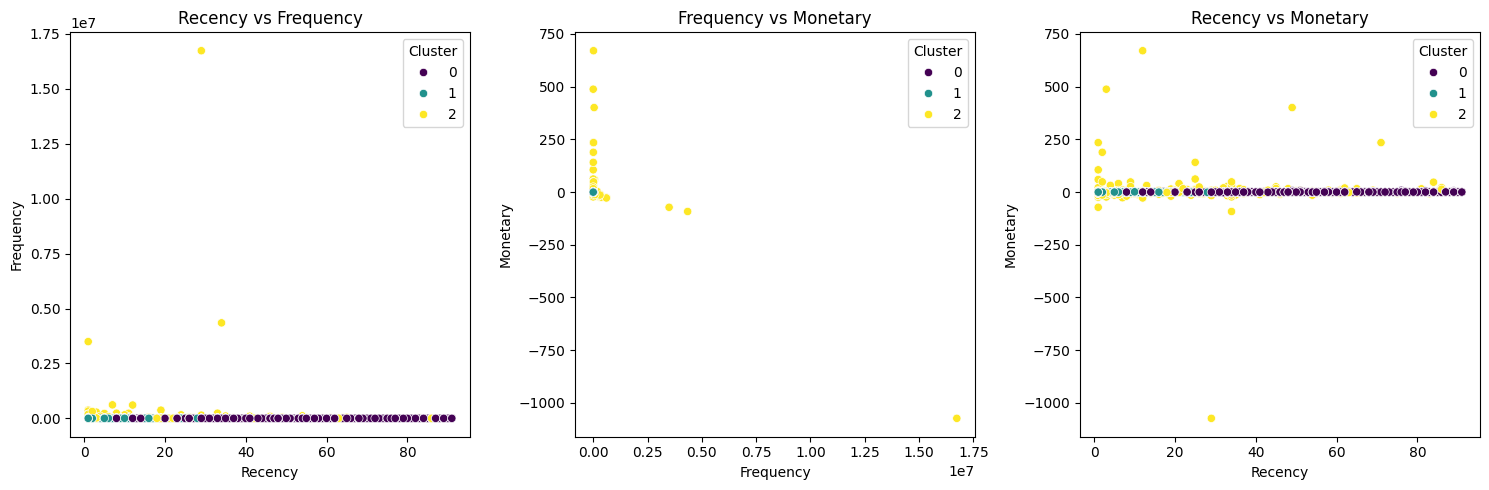

In [24]:
rfm_score.plot_rfm_clusters()

### Define and Assign the "High-Risk" Label

Analyze the resulting clusters to determine which one represents the least engaged and therefore highest-risk customer segment (typically characterized by low frequency and low monetary value).

In [16]:
rfm_score.assign_high_risk_label(rfm_data)

Identified Cluster 2 as high-risk:
   Cluster    Recency     Frequency  Monetary  risk_score
0        0  50.731584     58.689203 -0.059203         4.0
1        1   7.586491    537.060132 -0.363266         6.0
2        2  14.593407  67445.467033  1.022611         8.0

High-risk customers: 64895
Risk distribution:
is_high_risk
1    64895
0    30767
Name: count, dtype: int64


,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster,is_high_risk
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,0.824740,-0.105245,91,119,-0.046371,3,3,53.238407,2,1
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-1.212503,-0.105245,91,119,-0.054643,3,3,53.236339,2,1
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,0.824740,-0.105245,91,2,-0.050426,1,1,23.487393,0,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,0.824740,-0.105245,91,38,0.107717,3,3,33.026929,1,0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-1.212503,-0.105245,91,38,-0.059704,3,3,32.985074,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,AccountId_4841,SubscriptionId_3829,CustomerId_3078,-0.062591,2019-02-13 09:54:09+00:00,-0.349252,-0.044962,0.276904,-0.028743,...,-1.212503,-0.105245,1,573,-0.062591,2,3,143.984352,2,1
95658,TransactionId_91597,AccountId_3439,SubscriptionId_2643,CustomerId_3874,-0.046371,2019-02-13 09:54:25+00:00,-0.349252,-0.044962,0.167759,-0.062526,...,0.824740,-0.105245,1,43,-0.046371,2,3,11.488407,2,1
95659,TransactionId_82501,AccountId_4841,SubscriptionId_3829,CustomerId_3874,-0.054643,2019-02-13 09:54:35+00:00,-0.349252,-0.044962,0.167759,-0.062526,...,-1.212503,-0.105245,1,43,-0.054643,2,3,11.486339,2,1
95660,TransactionId_136354,AccountId_1346,SubscriptionId_652,CustomerId_1709,-0.030151,2019-02-13 10:01:10+00:00,-0.349252,-0.044962,0.204153,-0.059427,...,0.824740,-0.105245,1,524,-0.030151,2,2,131.742462,2,1


In [23]:
clustered_df.head()

,TransactionId,AccountId,SubscriptionId,CustomerId,Amount,TransactionStartTime,PricingStrategy,FraudResult,TotalTransactionAmount,AvgTransactionAmount,...,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,No_Subscription,No_Account,RFMS_Score,Cluster,is_high_risk
0,TransactionId_76871,AccountId_3957,SubscriptionId_887,CustomerId_4406,-0.046371,2018-11-15 02:18:49+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,0.824740,-0.105245,91,119,-0.046371,3,3,53.238407,2,1
1,TransactionId_73770,AccountId_4841,SubscriptionId_3829,CustomerId_4406,-0.054643,2018-11-15 02:19:08+00:00,-0.349252,-0.044962,0.170118,-0.067623,...,-1.212503,-0.105245,91,119,-0.054643,3,3,53.236339,2,1
2,TransactionId_26203,AccountId_4229,SubscriptionId_222,CustomerId_4683,-0.050426,2018-11-15 02:44:21+00:00,-0.349252,-0.044962,0.165122,-0.072568,...,0.824740,-0.105245,91,2,-0.050426,1,1,23.487393,0,0
3,TransactionId_380,AccountId_648,SubscriptionId_2185,CustomerId_988,0.107717,2018-11-15 03:32:55+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,0.824740,-0.105245,91,38,0.107717,3,3,33.026929,1,0
4,TransactionId_28195,AccountId_4841,SubscriptionId_3829,CustomerId_988,-0.059704,2018-11-15 03:34:21+00:00,-0.349252,-0.044962,0.175567,-0.008155,...,-1.212503,-0.105245,91,38,-0.059704,3,3,32.985074,1,0


In [ ]:
# Saving the preprocessed data to the folder.
clustered_df.to_csv('../Data/processed/credit_score_processed_data.csv')

# Model Training and Tracking
To develop a structured model training process that includes experiment tracking, model versioning, and unit testing.

In [2]:
# Read the preprocessed dataset
df_pre= pd.read_csv('../Data/processed/credit_score_processed_data.csv')

In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          95662 non-null  int64  
 1   TransactionId                       95662 non-null  object 
 2   AccountId                           95662 non-null  object 
 3   SubscriptionId                      95662 non-null  object 
 4   CustomerId                          95662 non-null  object 
 5   Amount                              95662 non-null  float64
 6   TransactionStartTime                95662 non-null  object 
 7   PricingStrategy                     95662 non-null  float64
 8   FraudResult                         95662 non-null  float64
 9   TotalTransactionAmount              95662 non-null  float64
 10  AvgTransactionAmount                95662 non-null  float64
 11  TransactionCount                    95662

In [7]:
df_pre = df_pre.drop(columns=['Unnamed: 0', 'TransactionStartTime','CustomerId', 'SubscriptionId','AccountId', 'TransactionId'], axis=1)

In [8]:
models = RiskPrediction(df_pre)

### Split the Data
Splitting the data into training and testing sets helps evaluate the model’s performance on unseen data


In [9]:
models.split_data()

X_train:           Amount  PricingStrategy  FraudResult  TotalTransactionAmount  \
51712 -0.050426        -0.349252    -0.044962                0.166358   
78249 -0.050240        -0.349252    -0.044962                0.283350   
58096 -0.046371        -0.349252    -0.044962                0.242764   
58335 -0.013932        -0.349252    -0.044962                0.217366   
32615 -0.023663        -0.349252    -0.044962                0.169304   
...         ...              ...          ...                     ...   
77440 -0.055292        -0.349252    -0.044962                0.165429   
93169 -0.054887        -0.349252    -0.044962                0.206542   
78652 -0.058504        -0.349252    -0.044962                0.175890   
19785 -0.046371        -0.349252    -0.044962                0.174943   
76109 -0.054805        -0.349252    -0.044962                0.254480   

       AvgTransactionAmount  TransactionCount  StdTransactionAmount  \
51712             -0.066760         -0.415

## Train the Models

### Logistic Regression
A simple and interpretable linear model that estimates the probability of a binary outcome using a logistic function.

In [10]:
models.train_logistic_regression()

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Random Forest
An ensemble of decision trees that improves prediction accuracy and controls overfitting by averaging multiple tree outputs.

In [11]:
models.train_random_forest()

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### Gradient Boosting Machines (GBM)
A powerful ensemble technique that builds trees sequentially, where each new tree corrects the errors of the previous ones.